## Principal Component Analysis for air quality

We would like to explain 85% of the variance for the air quality station with the most data on PM10 parameter from 2016-2019.

The approach will be the following:
* Import proper libraries 
* Load the dataset
* Find the station that has the most data for PM10
* Sorting the data (ISO Calendar or STRF time?)
* Standardize the data with Min-Max scaler (Optional)
* Performe PCA 
* Visualization and discussion of the results





## Importing libaries

In [39]:
#System
import os

#Data treatment
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import datetime as dt

#Graphics
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Modelling 
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale



## Load The dataset

In [2]:
raw_data_path = r'C:\Users\victo\PycharmProjects\DataScienceProj\DS-Proj\Air_modelling\ItesoAQ\data\processed\Outliers-rmvd\2016-2019_3std_preprocessed.csv'
raw_data = pd.read_csv(raw_data_path, parse_dates=['FECHA'])
raw_data.head()

,Unnamed: 0,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
0,0,2016-01-01,00:00,CO,0.61500,1.47100,0.18000,2.83000,7.16500,4.72000,1.01000,3.51300,2.21500,0.24000
1,1,2016-01-01,00:00,HR,71.50000,70.30000,73.40000,71.00000,79.80000,75.10000,74.20000,NaN,68.30000,70.10000
2,2,2016-01-01,00:00,NO2,0.01966,0.02763,0.02002,0.03182,0.02962,0.03133,0.02395,0.01947,0.02955,0.01083
3,3,2016-01-01,00:00,O3,0.00761,0.00472,0.00227,0.00190,0.00513,0.00360,0.00100,0.00258,0.00243,0.01247
4,4,2016-01-01,00:00,PM10,49.92000,146.95000,86.12000,174.04000,NaN,69.75000,197.67000,115.54000,143.40000,17.08000


## Find the station with the highest PM10 values

In [3]:
grouped_PM10_data = raw_data.groupby('PARAM').get_group('PM10')
grouped_PM10_data.head()

,Unnamed: 0,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
4,4,2016-01-01 00:00:00,00:00,PM10,49.92,146.95,86.12,174.04,NaN,69.75,197.67,115.54,143.40,17.08
13,13,2016-01-01 01:00:00,01:00,PM10,52.80,NaN,46.49,115.27,NaN,68.99,138.09,84.24,100.46,29.15
22,22,2016-01-01 02:00:00,02:00,PM10,52.71,113.44,63.93,99.00,NaN,117.70,98.79,135.39,82.05,30.89
31,31,2016-01-01 03:00:00,03:00,PM10,51.24,73.30,60.75,83.65,NaN,160.30,97.94,117.60,114.74,38.74
40,40,2016-01-01 04:00:00,04:00,PM10,58.84,52.55,108.09,49.70,NaN,180.89,134.39,164.68,118.83,51.48


In [4]:
grouped_PM10_data.describe()
#Note that there are negative values on some stations!

,Unnamed: 0,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
count,35064.000000,9709.000000,23128.000000,27504.000000,24584.000000,27862.000000,17797.000000,22917.000000,22368.000000,24467.000000,17498.000000
mean,157787.500000,32.172011,35.691260,35.197941,44.227399,67.413642,61.311266,34.006254,77.379548,42.338783,37.690783
std,91100.243304,19.957599,24.122784,25.697030,29.096060,64.339437,51.937488,20.951107,54.945496,31.333854,24.563289
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.230000,-1.090000,5.043000,-0.270000,0.000000
25%,78895.750000,18.190000,19.700000,18.340000,24.600000,27.300000,29.830000,19.600000,41.147750,22.580000,21.200000
50%,157787.500000,27.800000,30.500000,28.680000,38.100000,47.700000,45.270000,29.580000,62.723500,35.090000,32.200000
75%,236679.250000,41.200000,45.700000,44.050000,55.900000,81.800000,72.800000,43.600000,95.367250,53.200000,47.700000
max,315571.000000,145.000000,430.600000,387.200000,511.200000,918.200000,639.700000,276.020000,573.310000,594.150000,258.300000


In [5]:
grouped_PM10_data.count(axis=0).sort_values(ascending=False)

Unnamed: 0    35064
FECHA         35064
HORA          35064
PARAM         35064
LPIN          27862
CEN           27504
LDO           24584
TLA           24467
ATM           23128
OBL           22917
SFE           22368
MIR           17797
VAL           17498
AGU            9709
dtype: int64

LPIN is the station with the most PM10 data available. This will be the selected station in which PCA will be performed. 

## Sorting the data

In [50]:
raw_data_LPIN = raw_data[['FECHA','HORA','PARAM','LPIN']]
raw_data_LPIN.head()

,FECHA,HORA,PARAM,LPIN
0,2016-01-01,00:00,CO,7.16500
1,2016-01-01,00:00,HR,79.80000
2,2016-01-01,00:00,NO2,0.02962
3,2016-01-01,00:00,O3,0.00513
4,2016-01-01,00:00,PM10,NaN


In [51]:
LPIN_pivot = raw_data_LPIN.pivot(index='FECHA', columns='PARAM', values='LPIN')
LPIN_pivot.head()

PARAM,CO,HR,NO2,O3,PM10,SO2,TMP,WD,WS
FECHA,,,,,,,,,
2016-01-01 00:00:00,7.165,79.8,0.02962,0.00513,NaN,NaN,19.4,177.7,0.9
2016-01-01 01:00:00,6.272,84.0,0.02818,0.00467,NaN,NaN,18.3,196.7,0.6
2016-01-01 02:00:00,7.088,86.3,0.02512,0.00498,NaN,NaN,17.7,219.3,0.2
2016-01-01 03:00:00,5.977,90.0,0.02422,0.00448,NaN,NaN,16.6,85.0,0.3
2016-01-01 04:00:00,5.833,92.4,0.02477,0.00510,NaN,NaN,16.3,106.1,0.3


In [52]:
LPIN_week_data = LPIN_pivot.copy()
LPIN_week_data.reset_index(inplace=True)

In [53]:
LPIN_week_data = LPIN_week_data.groupby(pd.Grouper(key='FECHA', freq="W")).mean()
#LPIN_week_data.set_index(keys="FECHA",inplace=True)
LPIN_week_data.head(5)




PARAM,CO,HR,NO2,O3,PM10,SO2,TMP,WD,WS
FECHA,,,,,,,,,
2016-01-03,1.537186,58.579167,0.017278,0.018154,NaN,NaN,22.434722,199.281944,1.412500
2016-01-10,1.014361,43.918452,0.058526,0.015038,NaN,NaN,18.367262,229.638323,1.864881
2016-01-17,1.619946,49.792857,0.020512,0.017466,NaN,NaN,17.236905,191.702976,1.469461
2016-01-24,1.813400,39.445833,0.029775,0.024543,NaN,NaN,18.560119,169.398810,1.239286
2016-01-31,0.995889,44.000000,0.018533,0.017684,NaN,NaN,18.230247,190.727160,1.924691


In [54]:
#NaN values on the data
LPIN_week_data.isnull().sum()

PARAM
CO       14
HR        3
NO2      25
O3        5
PM10     32
SO2     125
TMP       3
WD        3
WS        3
dtype: int64

In [73]:
#dropping all the NaN rows
datos = LPIN_week_data.dropna(axis=0)

In [74]:
#Visualizing final DF
datos

PARAM,CO,HR,NO2,O3,PM10,SO2,TMP,WD,WS
FECHA,,,,,,,,,
2018-06-10,0.451288,53.667320,0.018314,0.050706,54.747619,0.000000,23.678431,215.359869,2.430588
2018-06-17,0.557664,64.071053,0.015520,0.026757,28.450633,0.000000,23.485526,187.336842,2.548026
2018-08-12,0.587557,72.108929,0.023988,0.036524,28.422876,0.002295,24.452381,149.941667,2.286905
2018-08-19,0.528554,68.728571,0.019351,0.040030,20.806383,0.001671,24.650000,161.612500,2.319162
2018-08-26,0.528042,72.061677,0.021395,0.038377,25.607143,0.002383,24.441916,153.385629,2.221687
2018-09-02,0.624179,76.460714,0.024577,0.033905,28.837908,0.002614,23.438095,177.493452,1.860976
2018-09-09,0.662288,77.228082,0.024822,0.029890,35.024299,0.002491,23.532877,173.570548,1.870139
2018-09-16,0.613815,77.244643,0.019738,0.024339,30.419277,0.002475,23.451786,183.690476,2.101198
2018-12-02,0.952788,71.276048,0.029323,0.017071,47.406536,0.005084,20.123494,182.526786,1.562275


In [66]:
datos.describe()

PARAM,CO,HR,NO2,O3,PM10,SO2,TMP,WD,WS
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.739062,55.274475,0.031041,0.032310,62.725392,0.004166,22.103711,192.988524,2.254205
std,0.328749,16.866241,0.019112,0.012119,34.350516,0.001543,1.929033,25.810003,0.490044
min,0.451288,23.404511,0.009597,0.015571,20.806383,0.000000,18.398214,149.941667,1.457143
25%,0.528298,44.770833,0.019545,0.023173,30.215591,0.003430,20.382738,174.200155,1.894296
50%,0.599785,59.013690,0.025660,0.029890,69.959524,0.004410,22.358209,190.507143,2.260479
75%,0.798643,69.135714,0.032560,0.037745,80.673036,0.005119,23.665109,214.559524,2.523120
max,1.824976,77.244643,0.096791,0.061220,158.810119,0.006807,25.678824,242.329167,3.257143


## Standardizing the data and training PCA Model on a Pipeline



In [67]:
#Training
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

#Model 
pca_model = pca_pipe.named_steps['pca']

In [68]:
pd.DataFrame(
    data    = pca_model.components_,
    columns = datos.columns,
    index = [f'PC{i}' for i in range(1,10)]
)


PARAM,CO,HR,NO2,O3,PM10,SO2,TMP,WD,WS
PC1,0.323688,-0.304414,0.362734,-0.334178,0.442619,0.375035,-0.390005,0.264658,-0.024433
PC2,-0.402511,-0.448214,-0.162593,0.143588,-0.028979,-0.072872,-0.091406,0.454037,0.607767
PC3,0.093135,0.099389,-0.334291,-0.740187,-0.023008,-0.522701,-0.190347,0.032236,0.103941
PC4,0.356772,-0.077762,-0.747041,0.362166,0.269196,0.089143,-0.294327,-0.062316,-0.080669
PC5,0.343560,-0.053149,0.108503,0.189066,0.363619,-0.484957,0.513117,0.433338,-0.114671
PC6,-0.031374,-0.097404,-0.369505,-0.385663,0.058809,0.527902,0.647010,0.054866,0.022071
PC7,-0.071038,0.426518,-0.119679,0.010909,-0.313167,0.186605,-0.175234,0.726046,-0.328405
PC8,-0.381723,-0.571224,-0.088479,-0.063078,-0.023179,-0.155428,-0.038868,-0.011424,-0.699891
PC9,0.572253,-0.412292,0.041334,0.009319,-0.704248,0.005684,0.050522,0.028620,0.037111


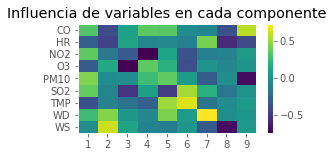

In [82]:

# Heatmap components
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
components = pca_model.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(pca_model.n_components_) + 1)
plt.title('Influencia de variables en cada componente')
plt.grid(False)
plt.colorbar();



----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.50291422 0.27741487 0.06701161 0.04369798 0.03963808 0.03580893
 0.02068061 0.00930261 0.00353108]




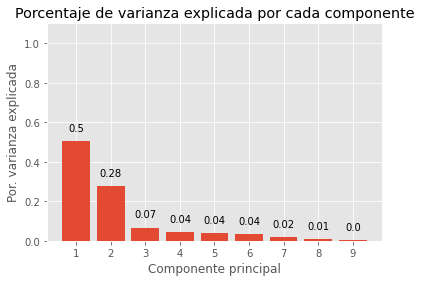

In [77]:


# Explained variance by component

print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca_model.explained_variance_ratio_, end="\n\n\n")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca_model.n_components_) + 1,
    height = pca_model.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, pca_model.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');



------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.50291422 0.78032909 0.8473407  0.89103869 0.93067677 0.9664857
 0.98716631 0.99646892 1.        ]




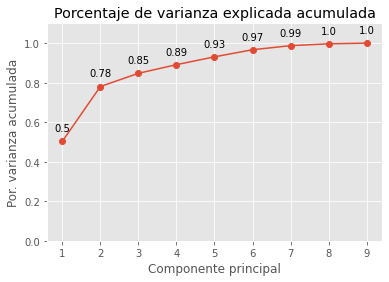

In [78]:
# Accumulated explained variance

prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum, end="\n\n\n")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_model.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');